## Telecom customer churn - Exploratory data analysis & mechine learning
##### Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# converting TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors='coerce')

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


### Cleaning Data

In [11]:
# checking for dublicate values
df.duplicated().sum()

0

In [12]:
# checking for null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
# droping the null values and checking
df.dropna(subset=['TotalCharges'] , inplace=True)
df.isnull().sum().sum()

0

### Exploratory data analysis

##### What is the overall churn rate for the company?

Overall churn rate 26.578498293515356 %


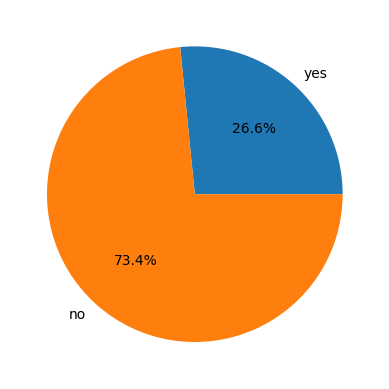

In [15]:
total_customers = len(df)
churned_customers = len(df[df['Churn'] == 'Yes'])
churn_rate = (churned_customers / total_customers) * 100

fig, ax = plt.subplots()
ax.pie([churn_rate, 100 - churn_rate], labels=['yes', 'no'] , autopct='%1.1f%%');
print(f"Overall churn rate {churn_rate} %")

**Answer:** 26.57 %

##### what is the ratio between males and females in our company?

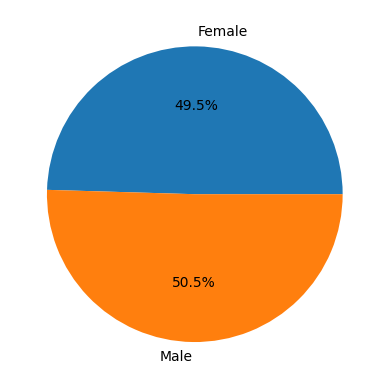

In [16]:
females = len(df[df['gender'] == df['gender'].unique()[0]])
totalgenders = len(df)
genders = (females / totalgenders) * 100

fig, ax = plt.subplots()
ax.pie([genders, 100 - genders], labels=df['gender'].unique(), autopct='%1.1f%%');

**Answer:** 49.5% are female and 50.5% are males

##### what is the ratio between Senior Citizens and others in the company ?

<Axes: >

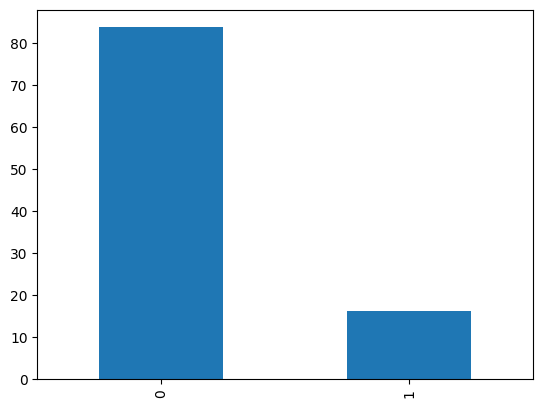

In [17]:
x=df['SeniorCitizen'].value_counts(normalize = True)*100
x.plot.bar()

**Answer:** Young people

##### Due to correlation matrix, which features have a linear relationship with each other?



<Axes: >

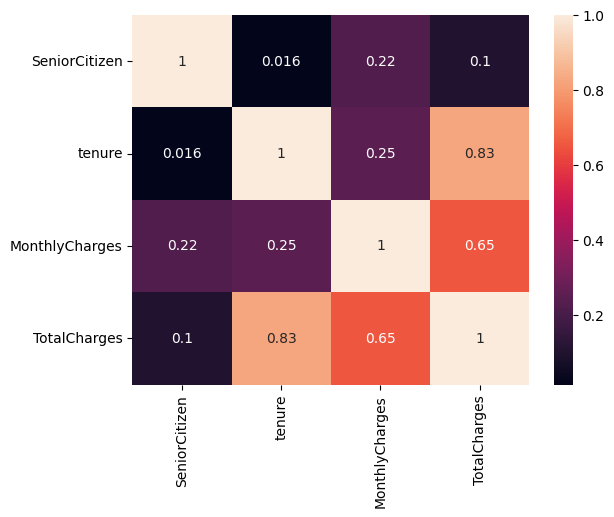

In [18]:
sns.heatmap(df.corr() , annot= True)

**Answer:**
* seniorcitizen has relationship with tenure,total charges, and monthly charges
* tenure has relationship with monthly charges

##### How many internet Services we provide in our company? (in ratio)

<Axes: >

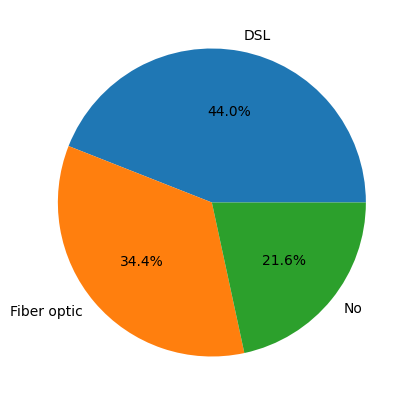

In [19]:
df['InternetService'].value_counts().plot(kind="pie",autopct='%1.1f%%',ylabel="", figsize=(10,5), labels=df['InternetService'].unique())

**Answer:** Fiber Optic service is the most common and used

##### what is our Contract types we provide?

In [20]:
Contract_counts = df['Contract'].value_counts()
Contract_ratios = (Contract_counts / len(df))*100
for contract, ratio in Contract_ratios.items():
    print(f"Internet Service: {contract}, Ratio: {ratio}")

Internet Service: Month-to-month, Ratio: 55.105233219567694
Internet Service: Two year, Ratio: 23.96188850967008
Internet Service: One year, Ratio: 20.932878270762227


##### How many payment methods we provide?

In [22]:
payment_methods = df['PaymentMethod'].value_counts(normalize=True)*100
print("The number of payment methods is:", len(payment_methods))
print("The payment method ratios are:")
print(payment_methods)

The number of payment methods is: 4
The payment method ratios are:
Electronic check             33.631968
Mailed check                 22.810011
Bank transfer (automatic)    21.928328
Credit card (automatic)      21.629693
Name: PaymentMethod, dtype: float64


**Answer:** most people prefer electronic check

##### who is the the most important customer ? (according to Monthly and Total charges)

In [21]:
customer_charges = df.groupby('customerID').agg({'MonthlyCharges': 'sum', 'TotalCharges': 'sum'})
most_important_customer = customer_charges.idxmax()[0]
print("The most important customer is:", most_important_customer)

The most important customer is: 7569-NMZYQ


##### what is the average monthly charge?

In [23]:
df['MonthlyCharges'].mean()

64.79820819112628

##### Does any other feature effect the churn?

In [27]:
cat  = list(df.select_dtypes(include='object').columns) # all the string values
del cat[0] # customerID
del cat[len(cat)-1] # customerID
num = list(df.select_dtypes(exclude='object').columns) # all the int vaues

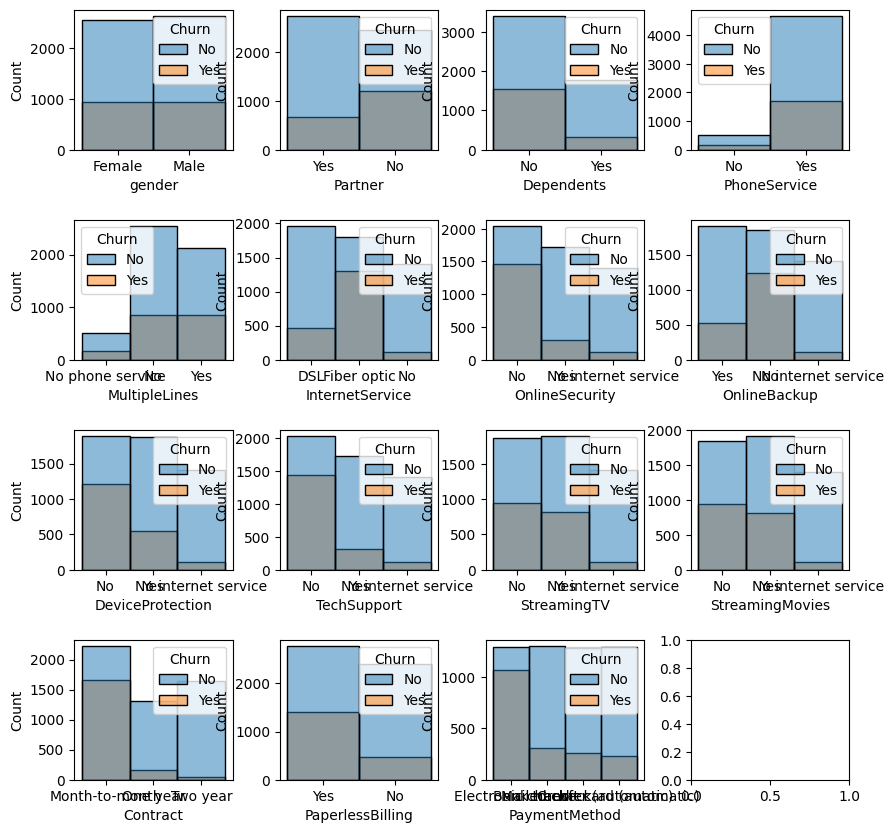

In [29]:
# for the string values
fig, axes = plt.subplots(4,4 , figsize=(10,10))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
axes = axes.flatten()
for i in range(len(cat)):
    sns.histplot(x = df[cat[i]], hue = df['Churn'],  bins = 40,ax=axes[i])

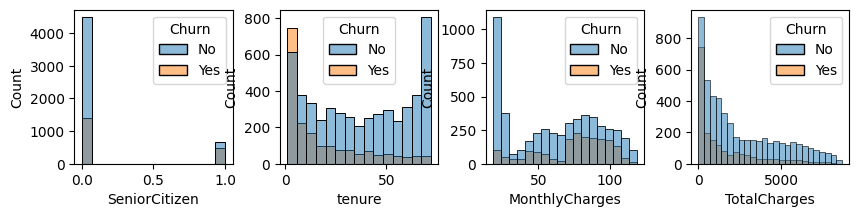

In [35]:
fig, axes = plt.subplots(1,4 , figsize=(10,2))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
axes = axes.flatten()
for i in range(len(num)):
    sns.histplot(x = df[num[i]], hue = df['Churn'],  ax=axes[i])

**Answer:** Tenure is the only feature that strongly strongly influence the churn

#### **Note:**
The Dataset it self is very good and large, there are lots of more things to find and information which you can extract from it. please try to come up with more questions and answers. its a good learning opportunity

### Data Pre-processing
<small>preparing data to create the machine learning model<small/>

In [39]:
# getting all the string features by droping all the number features
cat_features = df.drop(['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)
cat_features.head(2)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No


In [43]:
# all the integer features.
# dont need the customerID since its a unique id
num_features = df[['TotalCharges','MonthlyCharges','SeniorCitizen','tenure']]
num_features.head()

,TotalCharges,MonthlyCharges,SeniorCitizen,tenure
0,29.85,29.85,0,1
1,1889.50,56.95,0,34
2,108.15,53.85,0,2
3,1840.75,42.30,0,45
4,151.65,70.70,0,2


processing category features

In [44]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_cat = cat_features.apply(le.fit_transform)
df_cat.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1


In [48]:
# merging both
mldf = pd.merge(num_features, df_cat, left_index=True, right_index=True)

##### spliting data to train and test

In [46]:
from sklearn.model_selection import train_test_split

In [49]:
X = mldf.drop(['Churn'],axis=1)
y = mldf['Churn']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Modelling and Training

##### Importing RandomForestClassifier model

In [51]:
from sklearn.ensemble import RandomForestClassifier

##### Training the model

In [52]:
model = RandomForestClassifier(random_state=46)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

In [53]:
from sklearn.metrics import accuracy_score
preds = model.predict(X_test)
print(accuracy_score(preds,y_test))

0.7871607065919862


#### Overall the  model is performing well, with an accuracy of 0.78 on the test dataset.
##### There are importments that you can make by trying different type of models or even trying Over sampling the data